## Setting

### Module Import

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
#io와 pandas 모듈 import
import io
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기

In [173]:
df = pd.read_excel("/content/drive/MyDrive/(데이터)'19년 하반기~ '22년 상반기 공모전 raw데이터_2022_06_21_30_725,021.xlsx")

In [ ]:
%cd '/content/drive/MyDrive/예술경영 빅데이터 공모전'

/content/drive/MyDrive/예술경영 빅데이터 공모전


In [ ]:
# pd.read_excel로 xlsx파일 불러오기
# data1 = pd.read_excel('test_2206_21_30.xlsx') # 불러오기 소요시간: colab은 12m 44s, local은 11m 8s
# data1.to_csv("data.csv")
# data1 자리에 원본 데이터 이름 넣어서

In [250]:
sometrend = pd.read_csv('/content/drive/MyDrive/예술경영_빅데이터공모전.ver크롤링최종(박진영).csv')

In [ ]:
# data = data1 # 날라가는거 무서우니까 복사.

In [169]:
data = df

### 데이터 정보 확인

In [ ]:
data.shape

(725021, 68)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725021 entries, 0 to 725020
Data columns (total 68 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   전송사업자코드           725021 non-null  object 
 1   전송사업자명            725021 non-null  object 
 2   공연시설코드            725021 non-null  object 
 3   시설특성              725021 non-null  object 
 4   개관연도              712899 non-null  float64
 5   주소                725021 non-null  object 
 6   편의시설_레스토랑 여부      725021 non-null  object 
 7   편의시설_카페 여부        725021 non-null  object 
 8   편의시설_편의점 여부       725021 non-null  object 
 9   편의시설_놀이방 여부       725021 non-null  object 
 10  편의시설_수유실 여부       725021 non-null  object 
 11  장애인시설_주차장 여부      725021 non-null  object 
 12  장애인시설_화장실 여부      725021 non-null  object 
 13  장애인시설_경사로 여부      725021 non-null  object 
 14  장애인시설_전용엘리베이터 여부  725021 non-null  object 
 15  주차시설_자체 여부        725021 non-null  object 
 16  주차시설_공영 여부        72

In [ ]:
data.columns

Index(['전송사업자코드', '전송사업자명', '공연시설코드', '시설특성', '개관연도', '주소', '편의시설_레스토랑 여부',
       '편의시설_카페 여부', '편의시설_편의점 여부', '편의시설_놀이방 여부', '편의시설_수유실 여부',
       '장애인시설_주차장 여부', '장애인시설_화장실 여부', '장애인시설_경사로 여부', '장애인시설_전용엘리베이터 여부',
       '주차시설_자체 여부', '주차시설_공영 여부', '공연장코드', '좌석수', '장애인석', '무대시설_오케스트라피트 여부',
       '무대시설_연습실 여부', '무대시설_분장실 여부', '무대시설_무대넓이', '공연코드', '공연회차', '공연일시',
       '입장권고유번호', '예매/취소일시', '예매/취소구분', '예매/취소매수', '예매/취소금액', '예매/취소방식코드',
       '예매/취소방식명(관리시스템)', '예매/취소방식명(전송처)', '결제수단코드', '결제수단명(관리시스템)',
       '결제수단명(전송처)', '할인금액', '할인종류코드', '할인종류명(관리시스템)', '할인종류명(전송처)', '장당금액',
       '성별', '연령', '공연시작일자', '공연종료일자', '소요시간', '장르명', '세부장르명', '공연지역명',
       '출연진내용', '제작진내용', '기획제작사명', '원작자명', '극작가명', '수상실적', '관람연령', '아동공연 여부',
       '축제 여부', '내한공연 여부', '오픈런 여부', '판매시작일시', '판매종료일시', '좌석등급', '단독판매여부',
       '판매좌석수', '판매페이지URL'],
      dtype='object')

In [180]:
pd.set_option('display.max_columns', None)

# ⭐전처리(통합)

1. 크롤링 데이터 처리
 - bias(긍정, 부정, 중립), bias_perc(%) → 컬럼 생성
 - 원본 데이터 해당 위치에 join
 - indicator != both → drop

2. 원본 데이터 처리
 - 공연SW : 소요시간, 장르명, 세부장르명, 공연지역명, 무대시설_4가지
 - 서비스 : 오픈런여부(티켓팅용이성)


(1) 공연HW 입력데이터 전처리   
(2) [공연장코드&공연코드] 거래데이터 병합  
(3) 회귀분석, 클러스터링 & EDA

## 변수 인코딩

### 1. 라벨 인코딩

- 편의시설, 장애시설, 주차시설, 무대시설, 아동공연, 축제, 내한공연, 오픈런, 단독판매여부<br>
    → Y=1 / N=0으로 라벨인코딩. Y일 때 WTP와 양의 관계가 있을 것으로 가정할 수 있다. 따라서, 1이 수치적으로 가중의 의미/서열척도로서 의미를 갖도록 0,1라벨링을 진행한다. 주차 시설이 있을 때 높은 점수를 책정하기 때문에 0과 1은 서열척도로서 의미를 갖는다고 본다.

In [175]:
def label_encoding(df):
    result = df.replace({
            '편의시설_레스토랑 여부' : {'N' : 0, 'Y': 1},
            '편의시설_카페 여부' : {'N' : 0, 'Y': 1},
            '편의시설_편의점 여부' : {'N' : 0, 'Y': 1}, 
            '편의시설_놀이방 여부' : {'N' : 0, 'Y': 1}, 
            '편의시설_수유실 여부' : {'N' : 0, 'Y': 1},
            '장애인시설_주차장 여부' : {'N' : 0, 'Y': 1}, 
            '장애인시설_화장실 여부' : {'N' : 0, 'Y': 1}, 
            '장애인시설_경사로 여부' : {'N' : 0, 'Y': 1}, 
            '장애인시설_전용엘리베이터 여부' : {'N' : 0, 'Y': 1},
            '주차시설_자체 여부' : {'N' : 0, 'Y': 1}, 
            '주차시설_공영 여부' : {'N' : 0, 'Y': 1}, 
            '무대시설_오케스트라피트 여부' : {'N' : 0, 'Y': 1},
            '무대시설_연습실 여부' : {'N' : 0, 'Y': 1}, 
            '무대시설_분장실 여부' : {'N' : 0, 'Y': 1},
            '아동공연 여부'	: {'N' : 0, 'Y': 1},
            '축제 여부'	: {'N' : 0, 'Y': 1},
            '내한공연 여부'	: {'N' : 0, 'Y': 1},
            '오픈런 여부': {'N' : 0, 'Y': 1},
            '단독판매여부': {'N' : 0, 'Y': 1},
            })    
    return result

In [176]:
df = label_encoding(df)

### 2. 원-핫 인코딩

#### 2-1) 시설특성

In [177]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
# fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
df_pre_ohe = ohe.fit_transform(df[['시설특성']])
df_pre_ohe

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [178]:
ohe.categories_

[array(['공공(기타)', '공공(문예회관)', '국립', '기타(비공연장)', '민간(대학로 외)', '민간(대학로)'],
       dtype=object)]

In [179]:
ohe_result = pd.DataFrame(df_pre_ohe, columns = ['시설특성' + col for col in ohe.categories_[0]])
ohe_result.head()

,시설특성공공(기타),시설특성공공(문예회관),시설특성국립,시설특성기타(비공연장),시설특성민간(대학로 외),시설특성민간(대학로)
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


In [183]:
# column bind
df = pd.concat([df, ohe_result], axis = 1)

In [184]:
df.tail(1)

,전송사업자코드,전송사업자명,공연시설코드,시설특성,개관연도,주소,편의시설_레스토랑 여부,편의시설_카페 여부,편의시설_편의점 여부,편의시설_놀이방 여부,편의시설_수유실 여부,장애인시설_주차장 여부,장애인시설_화장실 여부,장애인시설_경사로 여부,장애인시설_전용엘리베이터 여부,주차시설_자체 여부,주차시설_공영 여부,공연장코드,좌석수,장애인석,무대시설_오케스트라피트 여부,무대시설_연습실 여부,무대시설_분장실 여부,무대시설_무대넓이,공연코드,공연회차,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,예매/취소매수,예매/취소금액,예매/취소방식코드,예매/취소방식명(관리시스템),예매/취소방식명(전송처),결제수단코드,결제수단명(관리시스템),결제수단명(전송처),할인금액,할인종류코드,할인종류명(관리시스템),할인종류명(전송처),장당금액,성별,연령,공연시작일자,공연종료일자,소요시간,장르명,세부장르명,공연지역명,출연진내용,제작진내용,기획제작사명,원작자명,극작가명,수상실적,관람연령,아동공연 여부,축제 여부,내한공연 여부,오픈런 여부,판매시작일시,판매종료일시,좌석등급,단독판매여부,판매좌석수,판매페이지URL,시설특성공공(기타),시설특성공공(문예회관),시설특성국립,시설특성기타(비공연장),시설특성민간(대학로 외),시설특성민간(대학로)
725020,FC000003,국립극장,FC222225,국립,1973.0,서울특별시 중구 장충단로 59 (장충동2가),0,0,1,0,0,0,1,1,1,1,0,FC222225-01,627,6,0,1,1,1401,PF313820,1,2022-06-26 13:00,280262577541900032,2022-06-25 18:37,1,1,0,3,현장,현장,99,기타,NaN,20000,99,기타,초대권 100%,20000,0,0,2022-06-22,2022-06-26,NaN,무용,한국무용,서울,"박윤미, 김지윤, 신화원, 임은주, 이수진, 홍연지, 장인숙 등",NaN,"(사)보훈무용예술협회(주최), (사)보훈무용예술협회(주관)",NaN,NaN,NaN,만 7세 이상,0,1,0,0,2022/05/18 10:00:00,2022/06/25 17:00:00,"22,24,25일 공연(50000), 23일 공연(30000), 26일 공연(20000)",0,627,https://www.ntok.go.kr/kr/Ticket/Performance/D...,0.0,0.0,1.0,0.0,0.0,0.0


#### 2-2) 성별

In [185]:
# df_pre_test['성별'] = df_pre['성별'].astype('str')
df['성별'] = df['성별'].apply(str)

In [186]:
df['성별'].value_counts()

0    314981
2    311584
1     98456
Name: 성별, dtype: int64

In [ ]:
# pd.set_option('display.max_rows', None)

In [187]:
ohe2 = OneHotEncoder(sparse=False)
# fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
df_pre_ohe2 = ohe2.fit_transform(df[['성별']])
df_pre_ohe2

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [188]:
ohe2.categories_

[array(['0', '1', '2'], dtype=object)]

In [189]:
ohe_result2 = pd.DataFrame(df_pre_ohe2, columns = ['성별'+ col for col in ohe2.categories_[0]])
ohe_result2.head()

,성별0,성별1,성별2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [191]:
# column bind
df = pd.concat([df, ohe_result2], axis = 1)

In [192]:
df.head(1)

,전송사업자코드,전송사업자명,공연시설코드,시설특성,개관연도,주소,편의시설_레스토랑 여부,편의시설_카페 여부,편의시설_편의점 여부,편의시설_놀이방 여부,편의시설_수유실 여부,장애인시설_주차장 여부,장애인시설_화장실 여부,장애인시설_경사로 여부,장애인시설_전용엘리베이터 여부,주차시설_자체 여부,주차시설_공영 여부,공연장코드,좌석수,장애인석,무대시설_오케스트라피트 여부,무대시설_연습실 여부,무대시설_분장실 여부,무대시설_무대넓이,공연코드,공연회차,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,예매/취소매수,예매/취소금액,예매/취소방식코드,예매/취소방식명(관리시스템),예매/취소방식명(전송처),결제수단코드,결제수단명(관리시스템),결제수단명(전송처),할인금액,할인종류코드,할인종류명(관리시스템),할인종류명(전송처),장당금액,성별,연령,공연시작일자,공연종료일자,소요시간,장르명,세부장르명,공연지역명,출연진내용,제작진내용,기획제작사명,원작자명,극작가명,수상실적,관람연령,아동공연 여부,축제 여부,내한공연 여부,오픈런 여부,판매시작일시,판매종료일시,좌석등급,단독판매여부,판매좌석수,판매페이지URL,시설특성공공(기타),시설특성공공(문예회관),시설특성국립,시설특성기타(비공연장),시설특성민간(대학로 외),시설특성민간(대학로),성별0,성별1,성별2
0,SE000102,티켓링크,FC223315,공공(문예회관),1975.0,대구광역시 중구 태평로 141 (태평로2가),0,1,0,0,1,1,1,1,1,1,0,FC223315-01,1284,14,1,1,1,344,PF314870,1,2022-06-21 19:30,1431527281_1,2022-06-10 13:40,1,1,0,99,기타,기획사/구단,1,현금,현금,0,99,기타,NaN,0,0,0,2022-06-21,2022-06-21,1시간 30분,클래식,기악,경상도,"이광호, 이정아, 백민아, 오수진 등",NaN,"한국기독교총연합회(주최), CTS기독교TV(주관)",NaN,NaN,NaN,만 7세 이상,0,0,0,0,2022/06/09 00:00:00,2022/06/20 17:00:00,전석무료(0),0,1석,http://www.ticketlink.co.kr/product/38972,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### 2-3) 기획제작사명, 공연지역명, 장르명

기획제작사명, 공연지역명, 장르명에 차이를 두지 않고 요인분석을 진행하기 위해 가중치를 부여하지 않는 원핫 인코딩을 한다.

In [ ]:
# data['장르명'].value_counts()
# data['공연지역명'].value_counts()

In [263]:
df = pd.get_dummies(df, columns = ['기획_제작사명','공연지역명','장르명'])

## 변수 병합

- 편의시설_식음료

In [193]:
df['편의시설_식음료'] = df['편의시설_레스토랑 여부']+df['편의시설_카페 여부']+df['편의시설_편의점 여부']

In [194]:
df['편의시설_식음료'].value_counts()

0    319666
2    174463
1    171262
3     59630
Name: 편의시설_식음료, dtype: int64

- 편의시설_아동

In [195]:
df['편의시설_아동'] = df['편의시설_놀이방 여부']+df['편의시설_수유실 여부']

In [196]:
df['편의시설_식음료'].value_counts()

0    319666
2    174463
1    171262
3     59630
Name: 편의시설_식음료, dtype: int64

- 장애인시설

In [197]:
df['장애인시설'] = df['장애인시설_주차장 여부']+ df['장애인시설_화장실 여부']+df['장애인시설_경사로 여부']+df['장애인시설_전용엘리베이터 여부']

In [198]:
df['장애인시설'].value_counts()

2    198454
0    177303
4    170226
3    130795
1     48243
Name: 장애인시설, dtype: int64

- SW_무대시설

In [199]:
df['SW_무대시설'] = df['무대시설_오케스트라피트 여부'] + df['무대시설_연습실 여부'] +	df['무대시설_분장실 여부']

In [200]:
df['SW_무대시설'].value_counts()

2    305794
3    201736
1    149844
0     67647
Name: SW_무대시설, dtype: int64

## 변수 생성

### 1번. SOMETREND (부호추가完)

In [251]:
sometrend.shape # 'Unnamed: 0', '기획_제작사명', '기획_제작사명_긍부정'

(406, 74)

In [252]:
maker = sometrend[['기획제작사명','기획_제작사명','기획_제작사명_긍부정', '기획_제작사_ESG키워드', 'ESG키워드_유무']]

In [253]:
maker['긍부정'] = maker['기획_제작사명_긍부정'].str.split(' ', expand=True)[0] # '긍부정', '비율' 컬럼 생성
maker['비율'] = maker['기획_제작사명_긍부정'].str.split(' ', expand=True)[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [254]:
maker['비율'] = maker["비율"].str[:2] # 부호 '%' 삭제

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [255]:
maker['비율'].fillna(0, inplace=True) # None값 0으로 대체

In [256]:
maker['비율'] = pd.DataFrame(maker['비율'].astype('str').astype('int'))  # 비율 데이터타입 변환

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [257]:
maker.dtypes

기획제작사명           object
기획_제작사명          object
기획_제작사명_긍부정      object
기획_제작사_ESG키워드    object
ESG키워드_유무         int64
긍부정              object
비율                int64
dtype: object

In [258]:
maker.loc[maker['긍부정'] == '부정','비율'] = maker['비율'] * (-1) # '부정'에 음수 부호 추가

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [259]:
maker.head(2)

,기획제작사명,기획_제작사명,기획_제작사명_긍부정,기획_제작사_ESG키워드,ESG키워드_유무,긍부정,비율
0,"한국기독교총연합회(주최), CTS기독교TV(주관)",한국기독교총연합회,부정 56%,"['한국기독교', '한기총', '회장', '대표', '목사', '지도자', '변호사...",1,부정,-56
1,"명음클래식(주최), 명음클래식(주관)",명음클래식,중립,NaN,0,중립,0


In [260]:
data_strd = pd.merge(df, maker, on='기획제작사명', how='left', indicator=True) # data의 '기획제작사명'을 key값으로 left merge, indicator 추가

ValueError: ignored

In [ ]:
data_strd['긍부정'].isnull().sum()

In [ ]:
df = data_strd.dropna(subset = ['긍부정'])

In [262]:
df.shape
# df.columns

(223518, 86)

### 2번. 주말/공휴일/기념일 여부


EDA 및 모델링을 위해 연, 월, 일을 각각 분리해 파생 변수로 처리한다. 또한, 공연 관람 수요에 영향을 줄 수 있는 요일 정보를 추가로 생성한다.

- 공연일시 = 결제한 공연의 일시로 ‘YYYY-MM-DD HH:MM:SS’ 로 표기
- 예매일시 = 결제한 일시로 ‘YYYY-MM-DD HH:MM:SS’ 로 표기



In [ ]:
'''1. 연, 월,요일 파생변수 생성'''

def make_date(df):
  df['공연일시'] = pd.to_datetime(df['공연일시'])
  df['공연일시_연'] = df['공연일시'].apply(lambda x: x.year)
  df['공연일시_월'] = df['공연일시'].apply(lambda x: x.month)
  df['공연일시_요일'] = df['공연일시'].apply(lambda x: x.weekday())
  return df

# 월:0 ~ 일:6

In [ ]:
'''2. 공연기간 (일 수) 파생변수 생성'''

from datetime import datetime, timedelta

def make_period(df):
  a = pd.to_datetime(df['공연시작일자'])  
  b = pd.to_datetime(df['공연종료일자'])

  df['공연기간'] = b - a + timedelta(days=1)
  df['공연기간'] = df['공연기간'].dt.days # timedelta를 int로 변경
  # df['공연규모'] =  ( df['공연기간'] * df['좌석수'] ) # int * int
  return df

In [ ]:
'''3. 주말, 공휴일, 기념일 여부 (N:0, Y:1) 파생변수 생성'''

# 공휴일 & 기념일이면 1, 아닌 날은 0으로 라벨링
def make_holiday_anniversay(df):
  tmp = []
  # 주말
  for i in range(len(df)):
    if df['공연일시_요일'][i]==5 or df['공연일시_요일'][i]==6: # 주말이면
        tmp.append(df['공연일시'][i])
# 21년도, 22년도 기준 공휴일 & 기념일 & 대체휴일
  공휴일 = ['2021-01-01','2021-02-11','2021-02-12', '2021-02-13','2021-02-14','2021-03-01','2021-03-14','2021-05-05','2021-05-08','2021-06-06', '2021-08-15','2021-08-16','2021-09-20','2021-09-21','2021-09-22','2021-10-03','2021-10-04','2021-10-09','2021-10-11','2021-12-24','2021-12-25',
         '2022-01-01', '2022-01.31', '2022-02-01', '2022-02-02', '2022-03-01', '2022-05-05', '2022-05-08', '2022-06-06', '2022-08-15', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-10-03', '2022-10-09', '2022-10-10', '2022-12-25']

  tmp.extend(공휴일)
 
  tmp = list(set(tmp)) #중복제거
  
  holiday_anniversary = []
  for i in range(len(df)):
    if df['공연일시'][i] in tmp:
      holiday_anniversary.append(1)
    else:
      holiday_anniversary.append(0)

  df['공휴일_기념일_여부'] = holiday_anniversary
  return df

In [ ]:
df = make_date(df)
df = make_period(df)
df = make_holiday_anniversay(df)

In [ ]:
df.tail()

,전송사업자코드,전송사업자명,공연시설코드,시설특성,개관연도,주소,편의시설_레스토랑 여부,편의시설_카페 여부,편의시설_편의점 여부,편의시설_놀이방 여부,...,판매종료일시,좌석등급,단독판매여부,판매좌석수,판매페이지URL,공연일시_연,공연일시_월,공연일시_요일,공연기간,공휴일_기념일_여부
725016,FC000003,국립극장,FC222225,국립,1973.0,서울특별시 중구 장충단로 59 (장충동2가),0,0,1,0,...,2022/06/25 17:00:00,"22,24,25일 공연(50000), 23일 공연(30000), 26일 공연(20000)",0,627,https://www.ntok.go.kr/kr/Ticket/Performance/D...,2022,6,6,5,1
725017,FC000003,국립극장,FC222225,국립,1973.0,서울특별시 중구 장충단로 59 (장충동2가),0,0,1,0,...,2022/06/25 17:00:00,"22,24,25일 공연(50000), 23일 공연(30000), 26일 공연(20000)",0,627,https://www.ntok.go.kr/kr/Ticket/Performance/D...,2022,6,6,5,1
725018,FC000003,국립극장,FC222225,국립,1973.0,서울특별시 중구 장충단로 59 (장충동2가),0,0,1,0,...,2022/06/25 17:00:00,"22,24,25일 공연(50000), 23일 공연(30000), 26일 공연(20000)",0,627,https://www.ntok.go.kr/kr/Ticket/Performance/D...,2022,6,6,5,1
725019,FC000003,국립극장,FC222225,국립,1973.0,서울특별시 중구 장충단로 59 (장충동2가),0,0,1,0,...,2022/06/25 17:00:00,"22,24,25일 공연(50000), 23일 공연(30000), 26일 공연(20000)",0,627,https://www.ntok.go.kr/kr/Ticket/Performance/D...,2022,6,6,5,1
725020,FC000003,국립극장,FC222225,국립,1973.0,서울특별시 중구 장충단로 59 (장충동2가),0,0,1,0,...,2022/06/25 17:00:00,"22,24,25일 공연(50000), 23일 공연(30000), 26일 공연(20000)",0,627,https://www.ntok.go.kr/kr/Ticket/Performance/D...,2022,6,6,5,1


### 3번. 연령 -> 나이대 파생 변수

In [ ]:
df['연령'] = 2022 - df['연령'] +1

In [ ]:
def age_categorize(age):
  age = (age//10)*10
  return age

In [ ]:
age_category = df['연령'].apply(age_categorize)

In [ ]:
age_category = age_category.astype('category')

In [ ]:
df.insert(6, '나이대', age_category)

In [ ]:
df['나이대'].value_counts()

2020    322557
30      141818
20      106049
40       97630
50       32966
60       12656
0         4261
10        3248
70        2663
80         463
110        271
120        219
90         186
100         34
Name: 나이대, dtype: int64

In [ ]:
df['나이대'].nunique()

14

In [ ]:
df['성별'].value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
725016    0
725017    0
725018    0
725019    0
725020    0
Name: 성별, Length: 725021, dtype: object>

In [ ]:
# 연령 라벨링
df.replace({'나이대': { 2020 : 0, 
                            0 : 1, 10 : 1,
                            20 : 2, 30 : 2, 40 : 2, 
                            50 : 3, 60 : 3, 70 : 3, 
                            80 : 4, 90 : 4, 100 : 4, 110 : 4, 120 : 4}},inplace=True)

### 4번. 공연지속률 = (공연종료일자 - 공연시작일자)/365

In [159]:
# 공연지속률 = 공연기간/365
df = df.assign(공연지속률 = df_pre['공연기간']/365)

## 변수 선택(1차,df)

In [ ]:
df.columns

Index(['전송사업자코드', '전송사업자명', '공연시설코드', '개관연도', '주소', '편의시설_레스토랑 여부',
       '편의시설_카페 여부', '편의시설_편의점 여부', '편의시설_놀이방 여부', '편의시설_수유실 여부',
       '장애인시설_주차장 여부', '장애인시설_화장실 여부', '장애인시설_경사로 여부', '장애인시설_전용엘리베이터 여부',
       '주차시설_자체 여부', '주차시설_공영 여부', '공연장코드', '좌석수', '장애인석', '무대시설_오케스트라피트 여부',
       '무대시설_연습실 여부', '무대시설_분장실 여부', '무대시설_무대넓이', '공연코드', '공연회차', '공연일시',
       '입장권고유번호', '예매/취소일시', '예매/취소구분', '예매/취소매수', '예매/취소금액', '예매/취소방식코드',
       '예매/취소방식명(관리시스템)', '예매/취소방식명(전송처)', '결제수단코드', '결제수단명(관리시스템)',
       '결제수단명(전송처)', '할인금액', '할인종류코드', '할인종류명(관리시스템)', '할인종류명(전송처)', '장당금액',
       '성별', '연령', '공연시작일자', '공연종료일자', '소요시간', '세부장르명', '출연진내용', '제작진내용',
       '기획제작사명', '원작자명', '극작가명', '수상실적', '관람연령', '아동공연 여부', '축제 여부', '내한공연 여부',
       '오픈런 여부', '판매시작일시', '판매종료일시', '좌석등급', '단독판매여부', '판매좌석수', '판매페이지URL',
       '장르명_국악', '장르명_무용', '장르명_뮤지컬', '장르명_복합', '장르명_연극', '장르명_오페라', '장르명_클래식',
       '공연지역명_강원도', '공연지역명_경기도', '공연지역명_경상도', '공연지역명_서울', '공연지역명_전라도',
       '공연지역명_제주도', '공연지역명_충청도', '공연일

**변수 선별 단계**  
- 공연 HW, 공연 SW, 서비스의 3가지 소분류에 부합하는 변수
  - *지역뮤지컬 공연 지불의사 분석 (2014, 이종수)*   
- WTP에 해당하는 변수는 고객이 실제로 지불한 '예매금액'
  - 결제/취소 시, 결제한 최종금액(할인 포함)  
- 인구통계학 정보 분류에 해당하는 변수 '성별', '연령'
- SOMETREND 관련 변수
- 등등

In [ ]:
# 사용할 데이터 칼럼 1차 선별 : df

df = df[['공연장코드','공연코드', # "단위"
         
       '기획_제작사명', '기획_제작사명_긍부정', '긍부정', '비율', # 썸트렌드         
         
       '시설특성_공공(기타)', '시설특성_공공(문예회관)', '시설특성_국립', # HW_공공_3
       '시설특성_기타(비공연장)', '시설특성_민간(대학로 외)', '시설특성_민간(대학로)', # HW_민간_2
       '편의시설_레스토랑 여부','편의시설_카페 여부', '편의시설_편의점 여부', '편의시설_놀이방 여부', '편의시설_수유실 여부', # HW_편의시설_5
       '장애인시설_주차장 여부', '장애인시설_화장실 여부', '장애인시설_경사로 여부', '장애인시설_전용엘리베이터 여부', # HW_장애인시설_4
       '주차시설_자체 여부', '주차시설_공영 여부', # HW_주차시설_2

       '장당금액', # WTP

       '성별', # 인구통계정보
       '연령', # 인구통계정보
    
       '장르명_국악', '장르명_무용', '장르명_뮤지컬', '장르명_복합', '장르명_연극', '장르명_오페라', '장르명_클래식', # SW_장르명_7
       '공연지역명_강원도', '공연지역명_경기도', '공연지역명_경상도', '공연지역명_서울', '공연지역명_전라도', '공연지역명_제주도', '공연지역명_충청도', # SW_공연지역명_7
       '무대시설_오케스트라피트 여부','무대시설_연습실 여부', '무대시설_분장실 여부', # SW_무대시설_3

       '오픈런 여부', # 서비스

       '아동공연 여부', '축제 여부', '내한공연 여부' # 기타 공연 특성
       ]]  

**변수 관련 사항**  
- 'SW_무대시설_무대넓이' 삭제

In [ ]:
df.shape

(223518, 47)

**‘오픈런’ 공연**은 공연이 끝나는 기간이 정해지지 않은 채 무기한으로 진행하는 공연 형식.  

주로 전용극장을 가진 대학로 소극장 공연들에서 쉽게 볼 수 있는 형식(메카 브로드웨이)  

예시: <오백에삼십>, <옥탑방고양이>, <라이어>, <김종욱찾기>  
강점: 계속해서 완성도를 높이고 문제점을 보완할 수 있다

<->  
'리미티드런' 공연은 공연 기간이 명확하게 정해진 공연 형식  

대극장 뮤지컬(세종문화회관, 예술의전당, 국립극장),  
연극 공연들이나 짧은 기간동안 선보이는 극단 공연에서 볼 수 있는 형식

출처 : 문화뉴스(https://www.mhns.co.kr)

## 데이터셋 가공

In [ ]:
df.isnull().sum()

공연장코드               0
공연코드                0
기획_제작사명             0
기획_제작사명_긍부정         0
긍부정                 0
비율                  0
시설특성_공공(기타)         0
시설특성_공공(문예회관)       0
시설특성_국립             0
시설특성_기타(비공연장)       0
시설특성_민간(대학로 외)      0
시설특성_민간(대학로)        0
편의시설_레스토랑 여부        0
편의시설_카페 여부          0
편의시설_편의점 여부         0
편의시설_놀이방 여부         0
편의시설_수유실 여부         0
장애인시설_주차장 여부        0
장애인시설_화장실 여부        0
장애인시설_경사로 여부        0
장애인시설_전용엘리베이터 여부    0
주차시설_자체 여부          0
주차시설_공영 여부          0
장당금액                0
성별                  0
연령                  0
장르명_국악              0
장르명_무용              0
장르명_뮤지컬             0
장르명_복합              0
장르명_연극              0
장르명_오페라             0
장르명_클래식             0
공연지역명_강원도           0
공연지역명_경기도           0
공연지역명_경상도           0
공연지역명_서울            0
공연지역명_전라도           0
공연지역명_제주도           0
공연지역명_충청도           0
무대시설_오케스트라피트 여부     0
무대시설_연습실 여부         0
무대시설_분장실 여부         0
오픈런 여부              0
아동공연 여부             0
축제 여부     

### 공연 거래 빈도 파생변수 & 공연코드 기준 중복데이터 제거 

In [ ]:
counts = df['공연코드'].value_counts().to_frame()
counts.reset_index(inplace=True)
counts
# value_counts(normalize=True) 상대적 비율

,index,공연코드
0,PF301651,31761
1,PF315495,17722
2,PF312778,12206
3,PF301926,11424
4,PF301248,10039
...,...,...
314,PF315048,1
315,PF315340,1
316,PF315752,1
317,PF315590,1


In [ ]:
counts.rename(columns={'공연코드':'공연거래빈도'}, inplace=True)

In [ ]:
counts.rename(columns={'index':'공연코드'}, inplace=True)
counts

,공연코드,공연거래빈도
0,PF301651,31761
1,PF315495,17722
2,PF312778,12206
3,PF301926,11424
4,PF301248,10039
...,...,...
314,PF315048,1
315,PF315340,1
316,PF315752,1
317,PF315590,1


In [ ]:
df2 = df

In [ ]:
df2.head(1)

,공연장코드,공연코드,기획_제작사명,기획_제작사명_긍부정,긍부정,비율,시설특성_공공(기타),시설특성_공공(문예회관),시설특성_국립,시설특성_기타(비공연장),...,공연지역명_제주도,공연지역명_충청도,무대시설_오케스트라피트 여부,무대시설_연습실 여부,무대시설_분장실 여부,무대시설_무대넓이,오픈런 여부,아동공연 여부,축제 여부,내한공연 여부
0,FC223315-01,PF314870,한국기독교총연합회,부정 56%,부정,56%,0,1,0,0,...,0,0,1,1,1,344,0,0,0,0


In [ ]:
df2.columns

Index(['공연장코드', '공연코드', '기획_제작사명', '기획_제작사명_긍부정', '긍부정', '비율', '시설특성_공공(기타)',
       '시설특성_공공(문예회관)', '시설특성_국립', '시설특성_기타(비공연장)', '시설특성_민간(대학로 외)',
       '시설특성_민간(대학로)', '편의시설_레스토랑 여부', '편의시설_카페 여부', '편의시설_편의점 여부',
       '편의시설_놀이방 여부', '편의시설_수유실 여부', '장애인시설_주차장 여부', '장애인시설_화장실 여부',
       '장애인시설_경사로 여부', '장애인시설_전용엘리베이터 여부', '주차시설_자체 여부', '주차시설_공영 여부', '장당금액',
       '성별', '연령', '장르명_국악', '장르명_무용', '장르명_뮤지컬', '장르명_복합', '장르명_연극',
       '장르명_오페라', '장르명_클래식', '공연지역명_강원도', '공연지역명_경기도', '공연지역명_경상도', '공연지역명_서울',
       '공연지역명_전라도', '공연지역명_제주도', '공연지역명_충청도', '무대시설_오케스트라피트 여부', '무대시설_연습실 여부',
       '무대시설_분장실 여부', '무대시설_무대넓이', '오픈런 여부', '아동공연 여부', '축제 여부', '내한공연 여부'],
      dtype='object')

In [ ]:
df2_dupli = df2.drop_duplicates(subset='공연코드')

In [ ]:
# 공연코드 기준 요약 전 개수/중복제거 후 개수/nunique 개수
print(len(df), len(df2_dupli), len(counts))

227258 319 319


In [ ]:
# 공연거래빈도 추가
df_merge = pd.merge(df2_dupli, counts, how='left', on='공연코드')

In [ ]:
df_merge.head(1)

,공연장코드,공연코드,기획_제작사명,기획_제작사명_긍부정,긍부정,비율,시설특성_공공(기타),시설특성_공공(문예회관),시설특성_국립,시설특성_기타(비공연장),...,공연지역명_충청도,무대시설_오케스트라피트 여부,무대시설_연습실 여부,무대시설_분장실 여부,무대시설_무대넓이,오픈런 여부,아동공연 여부,축제 여부,내한공연 여부,공연거래빈도
0,FC223315-01,PF314870,한국기독교총연합회,부정 56%,부정,56%,0,1,0,0,...,0,1,1,1,344,0,0,0,0,1096


In [ ]:
df['공연장코드'].value_counts()

FC222234-01    31761
FC222397-02    17722
FC222220-01    12206
FC222233-01    11424
FC222335-01    10039
               ...  
FC222322-01        2
FC222952-02        1
FC222996-01        1
FC222337-01        1
FC223626-01        1
Name: 공연장코드, Length: 234, dtype: int64

In [ ]:
df.nunique(axis=0)

공연장코드               223
공연코드                303
기획_제작사명             274
기획_제작사명_긍부정          49
긍부정                   3
비율                   42
시설특성_공공(기타)           2
시설특성_공공(문예회관)         2
시설특성_국립               2
시설특성_기타(비공연장)         2
시설특성_민간(대학로 외)        2
시설특성_민간(대학로)          2
편의시설_레스토랑 여부          2
편의시설_카페 여부            2
편의시설_편의점 여부           2
편의시설_놀이방 여부           2
편의시설_수유실 여부           2
장애인시설_주차장 여부          2
장애인시설_화장실 여부          2
장애인시설_경사로 여부          2
장애인시설_전용엘리베이터 여부      2
주차시설_자체 여부            2
주차시설_공영 여부            2
장당금액                178
성별                    3
연령                   95
장르명_국악                2
장르명_무용                2
장르명_뮤지컬               2
장르명_복합                2
장르명_연극                2
장르명_오페라               2
장르명_클래식               2
공연지역명_강원도             2
공연지역명_경기도             2
공연지역명_경상도             2
공연지역명_서울              2
공연지역명_전라도             2
공연지역명_제주도             2
공연지역명_충청도             2
무대시설_오케스트라피트 여부       2
무대시설_연습실 여부     

## final_df

In [ ]:
df.head(1)

,전송사업자코드,전송사업자명,공연시설코드,시설특성,개관연도,주소,나이대,편의시설_레스토랑 여부,편의시설_카페 여부,편의시설_편의점 여부,편의시설_놀이방 여부,편의시설_수유실 여부,장애인시설_주차장 여부,장애인시설_화장실 여부,장애인시설_경사로 여부,장애인시설_전용엘리베이터 여부,주차시설_자체 여부,주차시설_공영 여부,공연장코드,좌석수,장애인석,무대시설_오케스트라피트 여부,무대시설_연습실 여부,무대시설_분장실 여부,무대시설_무대넓이,공연코드,공연회차,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,예매/취소매수,예매/취소금액,예매/취소방식코드,예매/취소방식명(관리시스템),예매/취소방식명(전송처),결제수단코드,결제수단명(관리시스템),결제수단명(전송처),할인금액,할인종류코드,할인종류명(관리시스템),할인종류명(전송처),장당금액,성별,연령,공연시작일자,공연종료일자,소요시간,장르명,세부장르명,공연지역명,출연진내용,제작진내용,기획제작사명,원작자명,극작가명,수상실적,관람연령,아동공연 여부,축제 여부,내한공연 여부,오픈런 여부,판매시작일시,판매종료일시,좌석등급,단독판매여부,판매좌석수,판매페이지URL,공연일시_연,공연일시_월,공연일시_요일,공연기간,공휴일_기념일_여부,편의시설_식음료,편의시설_아동,장애인시설,SW_무대시설
0,SE000102,티켓링크,FC223315,공공(문예회관),1975.0,대구광역시 중구 태평로 141 (태평로2가),0,0,1,0,0,1,1,1,1,1,1,0,FC223315-01,1284,14,1,1,1,344,PF314870,1,2022-06-21 19:30:00,1431527281_1,2022-06-10 13:40,1,1,0,99,기타,기획사/구단,1,현금,현금,0,99,기타,NaN,0,0,2023,2022-06-21,2022-06-21,1시간 30분,클래식,기악,경상도,"이광호, 이정아, 백민아, 오수진 등",NaN,"한국기독교총연합회(주최), CTS기독교TV(주관)",NaN,NaN,NaN,만 7세 이상,0,0,0,0,2022/06/09 00:00:00,2022/06/20 17:00:00,전석무료(0),0,1석,http://www.ticketlink.co.kr/product/38972,2022,6,1,1,0,1,1,4,3


In [ ]:
df['예매/취소일시'] = pd.to_datetime(df['예매/취소일시'])

In [ ]:
df.sort_values(by='예매/취소일시')

In [ ]:
# 예매 후 취소한 거래의 과거 예매 내역 삭제
dup = df.drop_duplicates(subset=['입장권고유번호'], keep='last')

In [ ]:
dup.shape

(545801, 78)

In [ ]:
# df['wtp'] = df['예매/취소금액']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head(1)

,전송사업자코드,전송사업자명,공연시설코드,시설특성,개관연도,주소,나이대,편의시설_레스토랑 여부,편의시설_카페 여부,편의시설_편의점 여부,편의시설_놀이방 여부,편의시설_수유실 여부,장애인시설_주차장 여부,장애인시설_화장실 여부,장애인시설_경사로 여부,장애인시설_전용엘리베이터 여부,주차시설_자체 여부,주차시설_공영 여부,공연장코드,좌석수,장애인석,무대시설_오케스트라피트 여부,무대시설_연습실 여부,무대시설_분장실 여부,무대시설_무대넓이,공연코드,공연회차,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,예매/취소매수,예매/취소금액,예매/취소방식코드,예매/취소방식명(관리시스템),예매/취소방식명(전송처),결제수단코드,결제수단명(관리시스템),결제수단명(전송처),할인금액,할인종류코드,할인종류명(관리시스템),할인종류명(전송처),장당금액,성별,연령,공연시작일자,공연종료일자,소요시간,장르명,세부장르명,공연지역명,출연진내용,제작진내용,기획제작사명,원작자명,극작가명,수상실적,관람연령,아동공연 여부,축제 여부,내한공연 여부,오픈런 여부,판매시작일시,판매종료일시,좌석등급,단독판매여부,판매좌석수,판매페이지URL,공연일시_연,공연일시_월,공연일시_요일,공연기간,공휴일_기념일_여부,편의시설_식음료,편의시설_아동,장애인시설,SW_무대시설,wtp
0,SE000102,티켓링크,FC223315,공공(문예회관),1975.0,대구광역시 중구 태평로 141 (태평로2가),0,0,1,0,0,1,1,1,1,1,1,0,FC223315-01,1284,14,1,1,1,344,PF314870,1,2022-06-21 19:30:00,1431527281_1,2022-06-10 13:40:00,1,1,0,99,기타,기획사/구단,1,현금,현금,0,99,기타,NaN,0,0,2023,2022-06-21,2022-06-21,1시간 30분,클래식,기악,경상도,"이광호, 이정아, 백민아, 오수진 등",NaN,"한국기독교총연합회(주최), CTS기독교TV(주관)",NaN,NaN,NaN,만 7세 이상,0,0,0,0,2022/06/09 00:00:00,2022/06/20 17:00:00,전석무료(0),0,1석,http://www.ticketlink.co.kr/product/38972,2022,6,1,1,0,1,1,4,3,0


In [ ]:
# 취소 내역에 대한 예매금액(wtp) 0으로 설정

# for i in range(0, len(df['예매/취소구분'])):
#   if df['예매/취소구분'][i] == 2 :
#     df = df.loc[i, 'wtp'] = 0
#     i += 1
#   else: i += 1

df.loc[df['예매/취소구분']==2, 'wtp'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
check = df[df['예매/취소구분']==2]

In [ ]:
check['wtp'].value_counts()

0    176146
Name: wtp, dtype: int64

In [ ]:
df['wtp'].value_counts()

0         265597
10000      15721
150000     13647
100        12822
20000      12180
           ...  
7745           1
22832          1
29165          1
21600          1
34900          1
Name: wtp, Length: 605, dtype: int64

## 선형회귀 

In [ ]:
X = df[['공연장코드','공연코드', # "단위"
         
       '기획_제작사명', '긍부정 비율', 'ESG 이슈 정도(0,1)' # 썸트렌드 # ESG 추가         
         
       '시설특성'#

       '편의시설_레스토랑 여부','편의시설_카페 여부', '편의시설_편의점 여부', '편의시설_놀이방 여부', '편의시설_수유실 여부', # HW_편의시설_5
       '장애인시설_주차장 여부', '장애인시설_화장실 여부', '장애인시설_경사로 여부', '장애인시설_전용엘리베이터 여부', # HW_장애인시설_4
       '주차시설_자체 여부', '주차시설_공영 여부', # HW_주차시설_2

       '장당금액', # WTP

       '성별', # 인구통계정보
       '나이대', # 인구통계정보
    
       '장르명', # SW_장르명
       '공연지역명', # SW_공연지역명
       '무대시설_오케스트라피트 여부','무대시설_연습실 여부', '무대시설_분장실 여부', # SW_무대시설_3

       '오픈런 여부', # 서비스

       '아동공연 여부', # 기타 공연 특성
			 '축제 여부', 
			 '내한공연 여부']]

  Y = df['wtp']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train) 

In [ ]:
#x_test를 넣어 예측한 y 값들을 y_predict로 저장. 추후에 시험 데이터에 있는 실제 정답, 즉 y_test와 비교해보기 위함
y_predict = mlr.predict(x_test)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual wtp")
plt.ylabel("Predicted wtp")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [ ]:
# 검증데이터에 대한 예측값과 true값 비교 시각화

plt.plot(np.array(fit_train1.predict(test_x)),label = "pred")
plt.plot(np.array(test_y),label = "true")
plt.legend()
plt.show()

### 회귀계수, 상수 확인, 상관 살펴보기

In [ ]:
print(mlr.coef_)

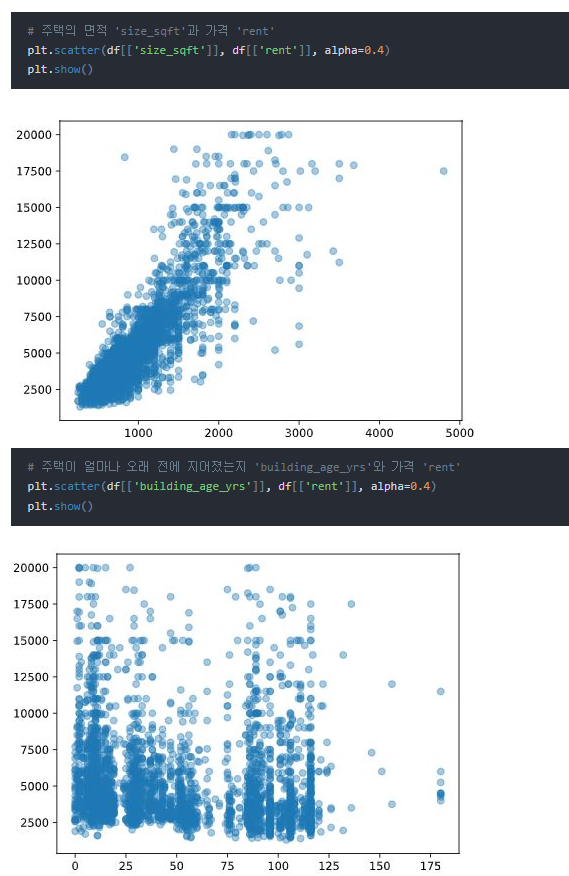

In [ ]:
sns.pairplot(x_data2)
plt.show()

위처럼 각 변수별로 시각화 자료 생성하기

위에서 데이터 세트를 나눠놨기 때문에 학습 시킨 모델을 테스트 할 수 있다.

다중선형회귀 모델의 정확도를 평가할 때는 잔차 분석(Analysis)을 하면 된다. 잔차는 실제 값 y와 예측된 값 ŷ의 차 e를 말한다. 
결정계수 R²가 클수록 실제값과 예측값이 유사함을 의미하며, 데이터를 잘 설명한다고 이해하자.

그러니 모델이 얼마나 정확한지 평가할 때도 이 결정계수 R²가 기준이 될 수 있는 거다.
 주택 사이즈(“size_sqft”)와 침실 개수(“bedrooms”)를 기준으로 임대료를 예측하는 모델의 R²이 0.72인 경우 그 2개의 변수들이 함께 임대료 변동의 72%를 설명한다는 뜻이다.

여기에 다른 x 변수, 주택이 얼마나 오래 전에 지어졌는지(“building_age_yrs”)를 모델에 추가하면 새로운 R²가 0.95로 증가했다고 하자. 그럼 주택 사이즈(“size_sqft”), 침실 개수(“bedrooms”), 얼마나 오래 전에 지어졌는지(“building_age_yrs”) 이 3개의 변수가 함께 임대료 변동의 95%를 설명한다는 거다.
최선의 R²는 1이겠지만 그건 말이 안 되고, 일반적으로 0.7 정도면 양호한 것으로 간주

In [ ]:
print(mlr.score(x_train, y_train))

## 다중공선성

분산팽창인자 VIF 가 10보다 크면 다중공선성이 존재한다고 판단

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# 직접 구현

def standardize_var(x):
    mean = np.mean(x)
    std = np.sqrt(np.sum(np.square(x-mean))/(len(x)-1))
    return ((x-mean)/std)/np.sqrt(len(x)-1)
 
sdf = df.apply(standardize_var) ## 데이터 표준화
sdf_X = sdf[['Tricep_ST', 'Thigh_C', 'Midarm_C']]
corr = np.array(sdf_X.corr()) ## 상관계수 행렬
corr_inv = np.linalg.inv(corr) ## 상관계수행렬의 역행렬
 
## standardized된 변수들로 이루어진 선형 회귀모형은 절편항이 없다. 
## 따라서 절편항은 제외한다. 포함시켜도 절편항이 0에 가까운 값으로 추정된다.
fit = ols('Body_fat~Tricep_ST+Thigh_C+Midarm_C-1',data=sdf).fit()
 
variables = [] ## 변수 이름
reg_coef = [] ## 해당 변수의 회귀 계수
vif = [] ## 해당 변수의 분산팽창인자
for i in range(len(sdf_X.columns)):
    col_name = sdf_X.columns[i]
    variables.append(col_name)
    reg_coef.append(fit.params[col_name])
    vif.append(corr_inv[i][i])
    
df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

In [ ]:
# 패키지
## 모형 정의(실제적합은 일어나지 않는다.) 
model = ols('Body_fat~Tricep_ST+Thigh_C+Midarm_C-1',data=sdf)
 
variables = []
reg_coef = []
vif = []
for i in range(len(model.exog_names)):
    col_name = model.exog_names[i]
    variables.append(col_name)
    reg_coef.append(model.fit().params[col_name])
    vif.append(variance_inflation_factor(model.exog, i))
    
df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

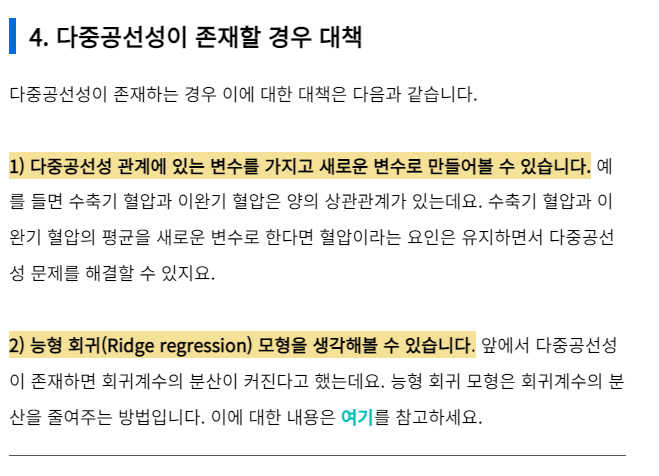

https://zephyrus1111.tistory.com/66

https://todayisbetterthanyesterday.tistory.com/8